In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import PoissonRegressor, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

In [2]:
# Load Data

file_path = 'SeoulBikeData.csv'

try:
    df = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    try:
        df = pd.read_csv(file_path, encoding='ISO-8859-1')
    except UnicodeDecodeError:
        df = pd.read_csv(file_path, encoding='cp1252')
        
# One-hot encoding for categorical columns
df = pd.get_dummies(df, columns=['Seasons', 'Holiday'])
x = df.drop(columns=['Rented Bike Count', 'Date', 'Functioning Day', 'Holiday_No Holiday'])
y = df["Rented Bike Count"]


In [3]:
# Split the data into training and testing sets
train_ratio = 0.70
val_ratio = 0.15
test_ratio = 0.15

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=test_ratio, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=val_ratio/(1-test_ratio), random_state=42)


In [4]:
# Create and train the Poisson regression model
poisson_model = PoissonRegressor()
poisson_model.fit(x_train, y_train)

# Make predictions
poisson_val_pred = poisson_model.predict(x_val)
poisson_test_pred = poisson_model.predict(x_test)

# Evaluate the MAE
mae_val = mean_absolute_error(y_val, poisson_val_pred)
print("Mean Absolute Error on Validation Set: ", mae_val)
mae_test = mean_absolute_error(y_test, poisson_test_pred)
print("Mean Absolute Error on Test Set: ", mae_test, "\n")

# Evaluate the MSE
mse_val = mean_squared_error(y_val, poisson_val_pred)
print("Mean Squared Error on Validation Set: ", mse_val)
mse_test = mean_squared_error(y_test, poisson_test_pred)
print("Mean Squared Error on Test Set: ", mse_test, "\n")

# Evaluate the R2
r2_val = r2_score(y_val, poisson_val_pred)
print("R2 on Validation Set: ", r2_val)
r2_test = r2_score(y_test, poisson_test_pred)
print("R2 on Test Set: ", r2_test)

Mean Absolute Error on Validation Set:  519.4656268199428
Mean Absolute Error on Test Set:  498.56827780710773 

Mean Squared Error on Validation Set:  424409.64234197966
Mean Squared Error on Test Set:  359721.9190784558 

R2 on Validation Set:  -1.4603966105308785e-06
R2 on Test Set:  -0.005570539743149805


/Users/nelidaschalichayllon/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:290: RuntimeWarning: invalid value encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights


In [5]:
# Create and train the Linear regression model
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

# Make predictions
linear_val_pred = linear_model.predict(x_val)
linear_test_pred = linear_model.predict(x_test)

# Evaluate the MSE
mse_val = mean_squared_error(y_val, linear_val_pred)
print("Mean Squared Error on Validation Set: ", mse_val)
mse_test = mean_squared_error(y_test, linear_test_pred)
print("Mean Squared Error on Test Set: ", mse_test, "\n")

# Evaluate the MAE
mae_val = mean_absolute_error(y_val, linear_val_pred)
print("Mean Absolute Error on Validation Set: ", mae_val)
mae_test = mean_absolute_error(y_test, linear_test_pred)
print("Mean Absolute Error on Test Set: ", mae_test, "\n")

# Evaluate the R2
r2_val = r2_score(y_val, linear_val_pred)
print("R2 on Validation Set: ", r2_val)
r2_test = r2_score(y_test, linear_test_pred)
print("R2 on Test Set: ", r2_test)

Mean Squared Error on Validation Set:  221176.57687142235
Mean Squared Error on Test Set:  176709.73285684062 

Mean Absolute Error on Validation Set:  346.4958978604754
Mean Absolute Error on Test Set:  323.54484353046854 

R2 on Validation Set:  0.47885986129710456
R2 on Test Set:  0.5060237032484924


In [6]:
# Create and train the Negative Binomial regression model
nb = sm.GLM(y_train, x_train, family=sm.families.NegativeBinomial())
nb_model = nb.fit()

# Make predictions
nb_val_pred = nb_model.predict(x_val)
nb_test_pred = nb_model.predict(x_test)

# Evaluate the MAE
mae_val = mean_absolute_error(y_val, nb_val_pred)
print("Mean Absolute Error on Validation Set: ", mae_val)
mae_test = mean_absolute_error(y_test, nb_test_pred)
print("Mean Absolute Error on Test Set: ", mae_test, "\n")

# Evaluate the MSE
mse_val = mean_squared_error(y_val, nb_val_pred)
print("Mean Squared Error on Validation Set: ", mse_val)
mse_test = mean_squared_error(y_test, nb_test_pred)
print("Mean Squared Error on Test Set: ", mse_test, "\n")

# Evaluate the R2
r2_val = r2_score(y_val, nb_val_pred)
print("R2 on Validation Set: ", r2_val)
r2_test = r2_score(y_test, nb_test_pred)
print("R2 on Test Set: ", r2_test)

Mean Absolute Error on Validation Set:  306.4216391811798
Mean Absolute Error on Test Set:  276.5346885526115 

Mean Squared Error on Validation Set:  210408.23857721465
Mean Squared Error on Test Set:  160528.03752362484 

R2 on Validation Set:  0.5042324092930229
R2 on Test Set:  0.5512581892421917


In [7]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(linear_model, x_train, y_train, cv=kfold, scoring='neg_mean_absolute_error')

Our Negative Binomial Regression Model gave us the best fit as seen by the MAE and other evaluations.

(array([  1.,   0.,   1.,   4.,   2.,   8.,   4.,   8.,   3.,  14.,  12.,
         25.,  24.,  37.,  63.,  81., 157., 270., 136.,  98.,  49.,  24.,
         18.,  13.,  12.,   5.,   6.,   2.,   4.,   1.]),
 array([-2250.58287449, -2118.84057967, -1987.09828486, -1855.35599004,
        -1723.61369522, -1591.8714004 , -1460.12910558, -1328.38681076,
        -1196.64451595, -1064.90222113,  -933.15992631,  -801.41763149,
         -669.67533667,  -537.93304185,  -406.19074704,  -274.44845222,
         -142.7061574 ,   -10.96386258,   120.77843224,   252.52072706,
          384.26302187,   516.00531669,   647.74761151,   779.48990633,
          911.23220115,  1042.97449597,  1174.71679078,  1306.4590856 ,
         1438.20138042,  1569.94367524,  1701.68597006]),
 <BarContainer object of 30 artists>)

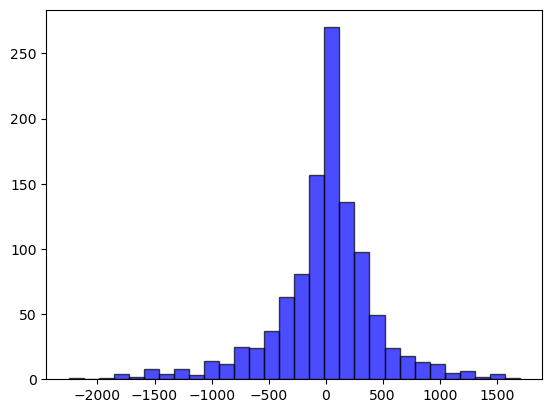

In [8]:
plt.hist(nb_val_pred - y_val, bins=30, alpha=0.7, color='blue', edgecolor='black')

8158   -0.287459
8493    0.029572
5403   -0.018804
6050    0.142756
8396   -0.026617
          ...   
503     0.220646
8168         inf
3071    1.426940
8476    3.322223
3689   -0.409082
Length: 1082, dtype: float64


(array([  5.,  27.,  58.,  92., 139., 126., 117.,  94.,  65.,  42.,  31.,
         29.,  26.,  24.,  18.,  15.,  17.,  12.,   8.,   9.,   9.,   7.,
          5.,   2.,   6.,   2.,   4.,   2.,   3.,   3.,   2.,   1.,   0.,
          0.,   2.,   2.,   1.,   0.,   2.,   0.,   0.,   2.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   1.,   1.,   1.,   4.,   0.,   0.,
          0.,   0.,   0.,   1.,   1.]),
 array([-0.90539378, -0.75697055, -0.60854732, -0.46012409, -0.31170086,
        -0.16327763, -0.0148544 ,  0.13356883,  0.28199205,  0.43041528,
         0.57883851,  0.72726174,  0.87568497,  1.0241082 ,  1.17253143,
         1.32095466,  1.46937789,  1.61780112,  1.76622435,  1.91464758,
         2.06307081,  2.21149404,  2.35991727,  2.5083405 ,  2.65676373,
         2.80518696,  2.95361019,  3.10203342,  3.25045665,  3.39887988,
         3.54730311,  3.69572634,  3.84414957,  3.9925728 ,  4.14099603,
         4.28941926,  4.43784249,  4.58626572,  4.73468895,  4.88311218,
      

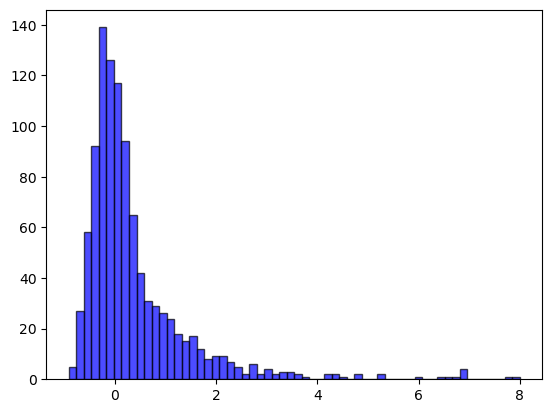

In [9]:
perc_error = ((nb_model.predict(x_val) - y_val)) / y_val
print(perc_error)
plt.hist(perc_error, bins=60, alpha=0.7, color='blue', edgecolor='black', range=[min(perc_error), 8])

Trying with feature selection

In [10]:
x_train.columns

Index(['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
       'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_Holiday'],
      dtype='object')

In [11]:
selected_cols = ['Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', 'Hour', 'Temperature(°C)']

# Create and train the Negative Binomial regression model
sel_nb = sm.GLM(y_train, x_train[selected_cols], family=sm.families.NegativeBinomial())
sel_nb_model = sel_nb.fit()

# Make predictions
sel_nb_val_pred = sel_nb_model.predict(x_val[selected_cols])
sel_nb_test_pred = sel_nb_model.predict(x_test[selected_cols])

# Evaluate the MAE
mae_val = mean_absolute_error(y_val, sel_nb_val_pred)
print("Mean Absolute Error on Validation Set: ", mae_val)
mae_test = mean_absolute_error(y_test, sel_nb_test_pred)
print("Mean Absolute Error on Test Set: ", mae_test, "\n")

# Evaluate the MSE
mse_val = mean_squared_error(y_val, sel_nb_val_pred)
print("Mean Squared Error on Validation Set: ", mse_val)
mse_test = mean_squared_error(y_test, sel_nb_test_pred)
print("Mean Squared Error on Test Set: ", mse_test, "\n")

# Evaluate the R2
r2_val = r2_score(y_val, sel_nb_val_pred)
print("R2 on Validation Set: ", r2_val)
r2_test = r2_score(y_test, sel_nb_test_pred)
print("R2 on Test Set: ", r2_test)


Mean Absolute Error on Validation Set:  329.083996168972
Mean Absolute Error on Test Set:  326.4162182376729 

Mean Squared Error on Validation Set:  234752.86276679774
Mean Squared Error on Test Set:  216542.83389577438 

R2 on Validation Set:  0.44687117779966934
R2 on Test Set:  0.3946738221681906


In [14]:
'''Create accuracy within range function, exact accuracy is not needed but 
if the prediction is within a certain range of the actual value, it is considered accurate'''
def accuracy_within_range(pred, actual, threshold):
    thresh_perc = threshold / 100
    errors = np.abs(actual - pred)
    within_bounds = errors <= thresh_perc * np.abs(actual)
    accuracy = np.mean(within_bounds)
    return accuracy

# Set the threshold (e.g., 5%)
threshold_percent = 10

# Calculate accuracy
test_accuracy = accuracy_within_range(y_test, nb_test_pred, threshold_percent)
print(f"Accuracy within {threshold_percent}% threshold: {test_accuracy * 100:.2f}%")


Accuracy within 10% threshold: 12.93%
